Introduction: 
    
    My business problem is a company wants to move to NYC but does not know where to go. One important factor is the CEO really likes chinese food. So I will use foursquare to determine where in NYC the companie should go. This will be based on the quality of the Chinese restaurants in the area. My hypothosis is that an area with a high density of Chinese retaurants will have better quality restaurants due to the competition. Therefore I will determine what neighborhood in NYC has the most Chinese restaurants, then verify that they have high ratings.
    

In [152]:

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import geocoder
import os
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [119]:
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [120]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [129]:
def get_venues(lat,lng):
    
    radius=1000
    LIMIT=100
    CLIENT_ID = 'JXEVSSZC0CDKB1A40HHG3KWXH2DP4HAD4AM24BBNPWDNJI4B' # your Foursquare ID
    CLIENT_SECRET ='AHAVAV4EOTNLXY2NXE5CQV4LQJ0FXRL3NMMSMKF1CYZH1PYX' # your Foursquare Secret
    VERSION = '20200320' # Foursquare API version
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [123]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [124]:
# get new york data
new_york_data=get_new_york_data()

In [125]:
new_york_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [126]:
new_york_data.shape


(306, 4)

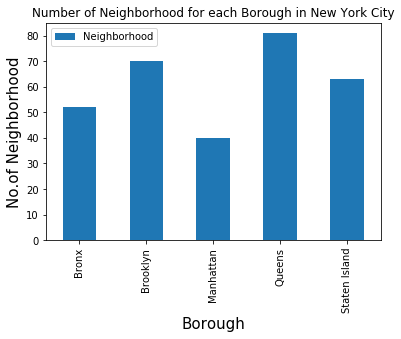

In [127]:
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


In [130]:
# prepare neighborhood list that contains chinese resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_resturants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(new_york_data),')','Chinese Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        chinese_rest_ny = chinese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Chinese Resturants in Wakefield, Bronx:2
( 2 / 306 ) Chinese Resturants in Co-op City, Bronx:2
( 3 / 306 ) Chinese Resturants in Eastchester, Bronx:2
( 4 / 306 ) Chinese Resturants in Fieldston, Bronx:2
( 5 / 306 ) Chinese Resturants in Riverdale, Bronx:2
( 6 / 306 ) Chinese Resturants in Kingsbridge, Bronx:2
( 7 / 306 ) Chinese Resturants in Marble Hill, Manhattan:2
( 8 / 306 ) Chinese Resturants in Woodlawn, Bronx:2
( 9 / 306 ) Chinese Resturants in Norwood, Bronx:2
( 10 / 306 ) Chinese Resturants in Williamsbridge, Bronx:2
( 11 / 306 ) Chinese Resturants in Baychester, Bronx:2
( 12 / 306 ) Chinese Resturants in Pelham Parkway, Bronx:2
( 13 / 306 ) Chinese Resturants in City Island, Bronx:2
( 14 / 306 ) Chinese Resturants in Bedford Park, Bronx:2
( 15 / 306 ) Chinese Resturants in University Heights, Bronx:2
( 16 / 306 ) Chinese Resturants in Morris Heights, Bronx:2
( 17 / 306 ) Chinese Resturants in Fordham, Bronx:2
( 18 / 306 ) Chinese Resturants in East Tremont, Bronx:

In [146]:
chinese_rest_ny.head()


,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4edbac4e775bcc53fc0ed5f8,Hong Kong China King
1,Bronx,Wakefield,4e2710b7a809510950dd6b32,Double Dragon
2,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant
3,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet
4,Bronx,Eastchester,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant


In [147]:
chinese_rest_ny.shape


(422, 4)

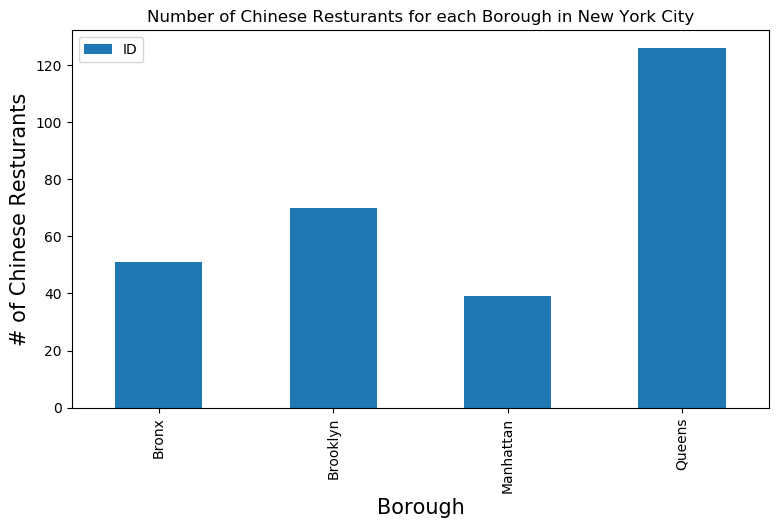

In [148]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('# of Chinese Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

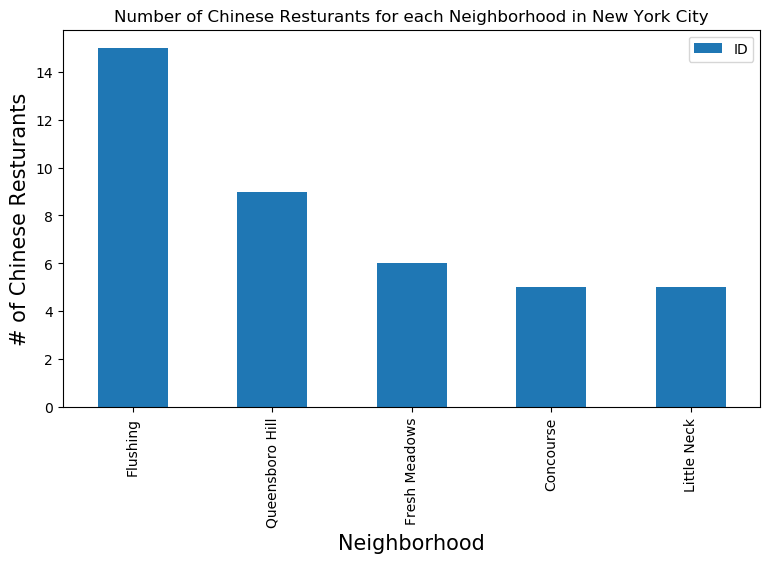

In [149]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('# of Chinese Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [151]:
chinese_rest_ny[chinese_rest_ny['Neighborhood']=='Flushing']


,Borough,Neighborhood,ID,Name
187,Queens,Flushing,5747a89b498ee4b7a5106556,DunHuang Lanzhou Beef Noodle
188,Queens,Flushing,52235ea211d2fe55782d764c,Dong Yi Feng
189,Queens,Flushing,4fa3f81be4b0a34ac673bf1e,Taipei Hong 台北夯
190,Queens,Flushing,4abfef82f964a520179320e3,New Imperial Palace 東湖
191,Queens,Flushing,4ef37491d3e32dc398c7c5c7,Laoma Mala Tang
192,Queens,Flushing,4faff7eae4b03b8055801cde,Xi'an Famous Foods
193,Queens,Flushing,4a1845c8f964a52092791fe3,Asian Jewels Seafood Restaurant 敦城海鲜酒家
194,Queens,Flushing,4ad50f59f964a520950121e3,Fu Run 賦潤東北美食
195,Queens,Flushing,4c78756397028cfaec16d8fe,New Golden Szechuan Chinese Restaurant
196,Queens,Flushing,4d1bcddc1356224bc6410abe,OK Ryan


In [136]:
address = '137-35 Northern Blvd, Flushing, NY 11354'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.76391405 -73.83007096050741


In [137]:
CLIENT_ID = 'JXEVSSZC0CDKB1A40HHG3KWXH2DP4HAD4AM24BBNPWDNJI4B' # your Foursquare ID
CLIENT_SECRET = 'AHAVAV4EOTNLXY2NXE5CQV4LQJ0FXRL3NMMSMKF1CYZH1PYX' # your Foursquare Secret
VERSION = '20200320'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JXEVSSZC0CDKB1A40HHG3KWXH2DP4HAD4AM24BBNPWDNJI4B
CLIENT_SECRET:AHAVAV4EOTNLXY2NXE5CQV4LQJ0FXRL3NMMSMKF1CYZH1PYX


In [138]:
search_query = 'Chinese'
radius = 1000
print(search_query + ' .... OK!')

Chinese .... OK!


In [139]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JXEVSSZC0CDKB1A40HHG3KWXH2DP4HAD4AM24BBNPWDNJI4B&client_secret=AHAVAV4EOTNLXY2NXE5CQV4LQJ0FXRL3NMMSMKF1CYZH1PYX&ll=40.76391405,-73.83007096050741&v=20200320&query=Chinese&radius=1000&limit=50'

In [142]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e824013dd0f850028cdf53a'},
 'response': {'venues': [{'id': '55a04fb7498e18131da5d46e',
    'name': 'Shun Won Flushing Chinese Restaurant',
    'location': {'address': '41-27 Main St',
     'lat': 40.75751488717232,
     'lng': -73.82885665529909,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75751488717232,
       'lng': -73.82885665529909}],
     'distance': 719,
     'postalCode': '11355',
     'cc': 'US',
     'neighborhood': 'Downtown Flushing',
     'city': 'Flushing',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['41-27 Main St',
      'Flushing, NY 11355',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1585

In [143]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,55a04fb7498e18131da5d46e,Shun Won Flushing Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1585594791,False,41-27 Main St,40.757515,-73.828857,"[{'label': 'display', 'lat': 40.75751488717232, 'lng': -73.82885665529909}]",719,11355,US,Downtown Flushing,Flushing,NY,United States,"[41-27 Main St, Flushing, NY 11355, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5691cab9498e33433e5b13dc,Chinese Herbal Health Club,"[{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'Massage Studio', 'pluralName': 'Massage Studios', 'shortName': 'Massage Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}]",v-1585594791,False,13608 38th Ave,40.760654,-73.830210,"[{'label': 'display', 'lat': 40.760654, 'lng': -73.83021}]",363,11354,US,NaN,Flushing,NY,United States,"[13608 38th Ave, Flushing, NY 11354, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4b64e355f964a5209cd72ae3,Chinese House 중국집,"[{'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Restaurants', 'shortName': 'Asian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1585594791,False,149-08 41st Ave,40.762189,-73.815442,"[{'label': 'display', 'lat': 40.76218927723865, 'lng': -73.81544243252516}]",1248,11355,US,NaN,Flushing,NY,United States,"[149-08 41st Ave, Flushing, NY 11355, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b3955def964a520dc5a25e3,Fortune House Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1585594791,False,4113 Kissena Blvd,40.758338,-73.829110,"[{'label': 'display', 'lat': 40.75833788, 'lng': -73.82911}]",625,11355,US,NaN,Flushing,NY,United States,"[4113 Kissena Blvd, Flushing, NY 11355, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4c78756397028cfaec16d8fe,New Golden Szechuan Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1585594791,False,13347 Roosevelt Ave,40.758791,-73.832610,"[{'label': 'display', 'lat': 40.75879066325611, 'lng': -73.8326098252684}]",609,11354,US,NaN,Flushing,NY,United States,"[13347 Roosevelt Ave (btwn Prince St & College Point Blvd), Flushing, NY 11354, United States]",btwn Prince St & College Point Blvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,Shun Won Flushing Chinese Restaurant,Chinese Restaurant,41-27 Main St,40.757515,-73.828857,"[{'label': 'display', 'lat': 40.75751488717232, 'lng': -73.82885665529909}]",719,11355,US,Downtown Flushing,Flushing,NY,United States,"[41-27 Main St, Flushing, NY 11355, United States]",NaN,55a04fb7498e18131da5d46e
1,Chinese Herbal Health Club,Massage Studio,13608 38th Ave,40.760654,-73.830210,"[{'label': 'display', 'lat': 40.760654, 'lng': -73.83021}]",363,11354,US,NaN,Flushing,NY,United States,"[13608 38th Ave, Flushing, NY 11354, United States]",NaN,5691cab9498e33433e5b13dc
2,Chinese House 중국집,Asian Restaurant,149-08 41st Ave,40.762189,-73.815442,"[{'label': 'display', 'lat': 40.76218927723865, 'lng': -73.81544243252516}]",1248,11355,US,NaN,Flushing,NY,United States,"[149-08 41st Ave, Flushing, NY 11355, United States]",NaN,4b64e355f964a5209cd72ae3
3,Fortune House Chinese Restaurant,Chinese Restaurant,4113 Kissena Blvd,40.758338,-73.829110,"[{'label': 'display', 'lat': 40.75833788, 'lng': -73.82911}]",625,11355,US,NaN,Flushing,NY,United States,"[4113 Kissena Blvd, Flushing, NY 11355, United States]",NaN,4b3955def964a520dc5a25e3
4,New Golden Szechuan Chinese Restaurant,Chinese Restaurant,13347 Roosevelt Ave,40.758791,-73.832610,"[{'label': 'display', 'lat': 40.75879066325611, 'lng': -73.8326098252684}]",609,11354,US,NaN,Flushing,NY,United States,"[13347 Roosevelt Ave (btwn Prince St & College Point Blvd), Flushing, NY 11354, United States]",btwn Prince St & College Point Blvd,4c78756397028cfaec16d8fe
5,New Dragon Town Chinese Restaurant 龙腾,Chinese Restaurant,41-12A Main St,40.757769,-73.829595,"[{'label': 'display', 'lat': 40.757769, 'lng': -73.829595}]",685,11355,US,NaN,Flushing,NY,United States,"[41-12A Main St, Flushing, NY 11355, United States]",NaN,4b19e68af964a520ede523e3
6,chinese martial arts promotion center,Martial Arts Dojo,35-10,40.763986,-73.831877,"[{'label': 'display', 'lat': 40.763985999999996, 'lng': -73.831877}]",152,NaN,US,NaN,Flushing,NY,United States,"[35-10 (Farmington St & Northern blvd), Flushing, NY, United States]",Farmington St & Northern blvd,5888f2b46c682b181023ed19
7,Dynasty Chinese Restaurant,Chinese Restaurant,147-18 Northern Blvd,40.763560,-73.829250,"[{'label': 'display', 'lat': 40.76356, 'lng': -73.82925}]",79,11354,US,NaN,Flushing,NY,United States,"[147-18 Northern Blvd, Flushing, NY 11354, United States]",NaN,4f32b02919836c91c7f001cc
8,Chinese-American Planning Council,Office,136-18 39th Ave,40.757620,-73.831738,"[{'label': 'display', 'lat': 40.75762022045004, 'lng': -73.83173755425842}]",714,11354,US,NaN,Flushing,NY,United States,"[136-18 39th Ave, Flushing, NY 11354, United States]",NaN,4cffeb5df1605481b67c9bea
9,Chinese-Korean Noodles & Dumpling,Dumpling Restaurant,133-31 39th Ave,40.760224,-73.833810,"[{'label': 'display', 'lat': 40.760224, 'lng': -73.83381}]",517,11354,US,NaN,Flushing,NY,United States,"[133-31 39th Ave, Flushing, NY 11354, United States]",NaN,4b101accf964a5201d6923e3


In [102]:
dataframe_filtered.name

0                  Shun Won Flushing Chinese Restaurant
1                            Chinese Herbal Health Club
2                                     Chinese House 중국집
3                      Fortune House Chinese Restaurant
4                New Golden Szechuan Chinese Restaurant
5                 New Dragon Town Chinese Restaurant 龙腾
6                 chinese martial arts promotion center
7                            Dynasty Chinese Restaurant
8                     Chinese-American Planning Council
9                     Chinese-Korean Noodles & Dumpling
10    Chinese American Planning Council (CPC) Queens...
11               Chinese-American Planning Council, Inc
12                       Chinese and Korean Combination
13                                     Chinese BBQ Cart
14                Wu Tang - Chinese Martial Arts Center
15                              Chinese Computer Repair
16                                 Chinese 53rd and 6th
17                        Chinese-Korean Dumplin

In [145]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='City Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [107]:
venue_id = '4b64e355f964a5209cd72ae3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4b64e355f964a5209cd72ae3?client_id=JXEVSSZC0CDKB1A40HHG3KWXH2DP4HAD4AM24BBNPWDNJI4B&client_secret=AHAVAV4EOTNLXY2NXE5CQV4LQJ0FXRL3NMMSMKF1CYZH1PYX&v=20200320'

In [108]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4b64e355f964a5209cd72ae3',
 'name': 'Chinese House 중국집',
 'contact': {'phone': '7183580468', 'formattedPhone': '(718) 358-0468'},
 'location': {'address': '149-08 41st Ave',
  'lat': 40.76218927723865,
  'lng': -73.81544243252516,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.76218927723865,
    'lng': -73.81544243252516}],
  'postalCode': '11355',
  'cc': 'US',
  'city': 'Flushing',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['149-08 41st Ave',
   'Flushing, NY 11355',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/chinese-house-%EC%A4%91%EA%B5%AD%EC%A7%91/4b64e355f964a5209cd72ae3',
 'categories': [{'id': '4bf58dd8d48988d142941735',
   'name': 'Asian Restaurant',
   'pluralName': 'Asian Restaurants',
   'shortName': 'Asian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
    'suffix': '.png'},
   'primary': True},
  {'id': '4bf58dd8d48988d113941735',
   'name': 'Korean Restaurant',
   'pluralNam

In [109]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.2


In [110]:
venue_id = '55a04fb7498e18131da5d46e' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/55a04fb7498e18131da5d46e?client_id=JXEVSSZC0CDKB1A40HHG3KWXH2DP4HAD4AM24BBNPWDNJI4B&client_secret=AHAVAV4EOTNLXY2NXE5CQV4LQJ0FXRL3NMMSMKF1CYZH1PYX&v=20200320'

In [111]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])


{'id': '55a04fb7498e18131da5d46e',
 'name': 'Shun Won Flushing Chinese Restaurant',
 'contact': {'phone': '7184606118', 'formattedPhone': '(718) 460-6118'},
 'location': {'address': '41-27 Main St',
  'lat': 40.75751488717232,
  'lng': -73.82885665529909,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.75751488717232,
    'lng': -73.82885665529909}],
  'postalCode': '11355',
  'cc': 'US',
  'neighborhood': 'Downtown Flushing',
  'city': 'Flushing',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['41-27 Main St',
   'Flushing, NY 11355',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/shun-won-flushing-chinese-restaurant/55a04fb7498e18131da5d46e',
 'categories': [{'id': '4bf58dd8d48988d145941735',
   'name': 'Chinese Restaurant',
   'pluralName': 'Chinese Restaurants',
   'shortName': 'Chinese',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stat

In [112]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.4


In [113]:
result['response']['venue']['tips']['count']

8

In [114]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e823b7c949393001bdc16b8'},
 'response': {'tips': {'count': 8,
   'items': [{'id': '57850bb2498edb61e5423fdd',
     'createdAt': 1468337074,
     'text': "I like the Soy Sauce Chicken, it's soft, delicious and yummy.",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/57850bb2498edb61e5423fdd',
     'photo': {'id': '57850c32498e677f9d4f2d5b',
      'createdAt': 1468337202,
      'source': {'name': 'Foursquare for iOS',
       'url': 'https://foursquare.com/download/#/iphone'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/190652826_LpFaPWTyvPEGQ5vhQeK0CVvban7zXxgkQlW7cIhtr0A.jpg',
      'width': 1920,
      'height': 1440,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/190652826_LpFaPWTyvPEGQ5vhQeK0CVvban7zXxgkQlW7cIhtr0A.jpg',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 1,
     'disagreeCount': 0,

In [115]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [116]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

C:\Users\ctawa\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"I like the Soy Sauce Chicken, it's soft, delicious and yummy.",1,0,57850bb2498edb61e5423fdd,Johnson,T,NaN,190652826
